# Relationship between public debt and GDP growth 


This project seeks to analyse the relationship between public debt and real GDP growth in Sub-Saharan 
Resource-intensive and non-resource-intensive Sub-Saharan African countries

Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

import warnings

warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)



# Read and clean data

Using the IMF AFR Regional Economic Outlook we import datasets for Real Per Capita GDP Growth (Annual percent change) and the Government Debt (Percent of GDP).

In [3]:
#We import the GDPData and DebtData and inspect the data
GDPData = pd.read_csv('GDPGrowthData-All.csv', delimiter=';')
DebtData = pd.read_csv('DebtData-All.csv', delimiter=';')
#The two datasets are identical in structure, so we will only display one of them in the data cleaning proces
display(GDPData)

,Real Per Capita GDP Growth (Annual percent change),2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,"7,13002378","11,0085151","7,611984132","9,9352311","7,159206471","-2,798670973","1,015170454","-0,345131558","4,538092554",...,"-2,642971423","-6,011877291","-3,633445779","-4,676609243","-4,017052156","-8,672491127","-1,954664333","-0,438960711","-1,694201086","0,266323328"
2,Benin,"1,316505223","-1,467824074","0,811426917","2,982034825","1,849634571","-0,648430263","-0,839369886","-0,007422704","1,800063786",...,"-1,181677804","0,335852248","2,603556528","3,624262544","3,824506878","0,951937862","4,129264432","3,319872865","2,587637195","3,398716724"
3,Botswana,"-0,360239488","3,102066272","4,060814622","3,734067816","1,176918798","-15,89055765","7,875871145","4,717165868","-2,070174149",...,"-6,699965248","5,048819767","1,970663783","2,083051442","1,042060184","-10,40033003","10,05052587","4,098347015","2,092020193","2,412381096"
4,Burkina Faso,"1,250803723","5,293432973","2,986692134","1,001302626","2,731085635","-0,01247427","5,305144555","3,502706594","3,273591496",...,"0,877785605","2,893498327","3,203256836","3,692238467","2,869545172","-0,852021147","3,985314091","-1,290475581","1,520630401","3,542102401"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,SSA excluding Nigeria and South Africa,"3,447278261","3,571687695","2,839090371","3,885951663","3,184049438","0,788599844","3,19731919","3,058760784","3,165871901",...,"1,469502252","0,68727074","1,941754006","1,875342535","2,014401423","-2,581545887","2,64120069","2,423211085","1,842827162","2,548018914"
66,Sub-Saharan Africa,"4,47179197","3,880782451","3,526908206","4,072343542","3,107110311","1,090903492","4,198545091","2,44582409","2,186454234",...,"0,702514019","-0,922622032","0,502777856","0,856381803","0,777393288","-3,90083797","2,464749774","1,755495001","1,032155308","1,656233947"
67,WAEMU,"-0,552620393","0,682185752","0,275486063","0,043162155","1,185399335","0,302606449","1,247637955","-2,130503843","3,769496099",...,"3,330821662","3,15291599","3,460161784","2,656211281","2,908182666","-1,082502745","3,08288132","2,736691324","2,304269019","4,039794575"
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that we have some 'NaN' rows we want to get rid of and also the last row that we want to get rid of. 

In [4]:
#Get rid of empty rows
GDPData.dropna(how='all', inplace=True)
DebtData.dropna(how='all', inplace=True)
#Get rid of last row
# Get the index of the last row
last_row_index_GDP = GDPData.index[-1]
last_row_index_Debt = DebtData.index[-1]

# Drop the last row
GDPData.drop(last_row_index_GDP, inplace=True)
DebtData.drop(last_row_index_Debt, inplace=True)

display(GDPData)

,Real Per Capita GDP Growth (Annual percent change),2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Angola,"7,13002378","11,0085151","7,611984132","9,9352311","7,159206471","-2,798670973","1,015170454","-0,345131558","4,538092554",...,"-2,642971423","-6,011877291","-3,633445779","-4,676609243","-4,017052156","-8,672491127","-1,954664333","-0,438960711","-1,694201086","0,266323328"
2,Benin,"1,316505223","-1,467824074","0,811426917","2,982034825","1,849634571","-0,648430263","-0,839369886","-0,007422704","1,800063786",...,"-1,181677804","0,335852248","2,603556528","3,624262544","3,824506878","0,951937862","4,129264432","3,319872865","2,587637195","3,398716724"
3,Botswana,"-0,360239488","3,102066272","4,060814622","3,734067816","1,176918798","-15,89055765","7,875871145","4,717165868","-2,070174149",...,"-6,699965248","5,048819767","1,970663783","2,083051442","1,042060184","-10,40033003","10,05052587","4,098347015","2,092020193","2,412381096"
4,Burkina Faso,"1,250803723","5,293432973","2,986692134","1,001302626","2,731085635","-0,01247427","5,305144555","3,502706594","3,273591496",...,"0,877785605","2,893498327","3,203256836","3,692238467","2,869545172","-0,852021147","3,985314091","-1,290475581","1,520630401","3,542102401"
5,Burundi,"0,743909609","3,894884711","2,343502082","0,438788825","1,511822841","0,496366831","1,864499325","0,904561102","1,30621554",...,"-6,699029126","-3,682188998","-2,616273126","-1,349595931","-1,123815647","-2,58728668","0,11582752","-1,139027758","0,326282418","2,864291017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,SACU,"3,312286951","4,006795954","4,270289058","3,952898993","1,68223057","-3,332420117","1,807899378","1,767728683","0,873047595",...,"-0,32778796","-0,598225697","-0,3204375","0,141713431","-1,09008336","-7,422353175","4,032143568","1,329445603","-0,375026401","0,432626288"
64,SADC,"3,533208259","4,397780193","4,123110456","4,732275007","2,517471107","-2,035991739","2,41748589","2,093085052","2,094442191",...,"-0,004705216","-0,867925616","-0,12219354","0,124224185","-0,803187898","-6,190302847","2,698348313","1,588481855","0,359179872","0,99773713"
65,SSA excluding Nigeria and South Africa,"3,447278261","3,571687695","2,839090371","3,885951663","3,184049438","0,788599844","3,19731919","3,058760784","3,165871901",...,"1,469502252","0,68727074","1,941754006","1,875342535","2,014401423","-2,581545887","2,64120069","2,423211085","1,842827162","2,548018914"
66,Sub-Saharan Africa,"4,47179197","3,880782451","3,526908206","4,072343542","3,107110311","1,090903492","4,198545091","2,44582409","2,186454234",...,"0,702514019","-0,922622032","0,502777856","0,856381803","0,777393288","-3,90083797","2,464749774","1,755495001","1,032155308","1,656233947"


We want to make this into panel data 'long format' for the merge of the datasets later. 

In [5]:
# Transform the data into a long format
GDP_panel_data = GDPData.melt(id_vars=['Real Per Capita GDP Growth (Annual percent change)'], 
                       var_name="Year", 
                       value_name="GDP Growth Rate")
Debt_panel_data = DebtData.melt(id_vars=['Government Debt (% of GDP) (Percent of GDP)'], 
                       var_name="Year", 
                       value_name="Government debt (Percent of GDP)")

# Defining the columns
GDP_panel_data.columns = ["Country name", "Year", "Real per capita GDP growth rate"]
Debt_panel_data.columns = ["Country name", "Year", "Government debt (Percent of GDP)"]

# Convert 'Year' to integer for proper sorting
GDP_panel_data['Year'] = GDP_panel_data['Year'].astype(int)
Debt_panel_data['Year'] = Debt_panel_data['Year'].astype(int)

# Sort the data by country and year
GDP_panel_data = GDP_panel_data.sort_values(by=["Country name", "Year"])
Debt_panel_data = Debt_panel_data.sort_values(by=["Country name", "Year"])
GDP_panel_data.to_csv('Panel_data_print_GDP', index=False)

print(GDP_panel_data)

     Country name  Year Real per capita GDP growth rate
0          Angola  2004                      7,13002378
67         Angola  2005                      11,0085151
134        Angola  2006                     7,611984132
201        Angola  2007                       9,9352311
268        Angola  2008                     7,159206471
...           ...   ...                             ...
1116     Zimbabwe  2020                    -9,505027888
1183     Zimbabwe  2021                     6,306549466
1250     Zimbabwe  2022                     4,045850717
1317     Zimbabwe  2023                     1,900288606
1384     Zimbabwe  2024                     1,615923398

[1407 rows x 3 columns]


# Merging the data

We merge the two datasets using an inner merge. 

In [14]:
#Merge the data for where rows 'Country name' and 'Year' match
merged_data = pd.merge(GDP_panel_data, Debt_panel_data, on=['Country name', 'Year'], how = 'inner')
merged_data.to_csv('Merged_data_print', index=False)
display(merged_data)

,Country name,Year,Real per capita GDP growth rate,Government debt (Percent of GDP)
0,Angola,2004,"7,13002378","47,7170673"
1,Angola,2005,"11,0085151","33,46404183"
2,Angola,2006,"7,611984132","18,72879033"
3,Angola,2007,"9,9352311","21,04349445"
4,Angola,2008,"7,159206471","31,37823243"
...,...,...,...,...
1402,Zimbabwe,2020,"-9,505027888","84,36544583"
1403,Zimbabwe,2021,"6,306549466","59,76893832"
1404,Zimbabwe,2022,"4,045850717","98,44937687"
1405,Zimbabwe,2023,"1,900288606","95,4346161"


# Plots and Analysis

To explore the data we make an interactive plot where you can see the GDP Growth and Public Debt by choosing the desired country in the drop down menu. 

In [17]:
# Convert relevant columns to string, replace commas, handle 'no data', and convert to float
merged_data['Real per capita GDP growth rate'] = merged_data['Real per capita GDP growth rate'].astype(str).replace(',', '.').replace('no data', np.nan).astype(float)
merged_data['Government debt (Percent of GDP)'] = merged_data['Government debt (Percent of GDP)'].astype(str).replace(',', '.').replace('no data', np.nan).astype(float)

# Dropdown menu for selecting the country
country_dropdown = widgets.Dropdown(
    options=sorted(merged_data['Country name'].unique()),
    value='Angola',
    description='Country:',
    disabled=False,
)

# Function to update the plot
def update_plot(country):
    # Filter data for the selected country
    country_data = merged_data[merged_data['Country name'] == country]
    
    # Ensure the 'Year' column is an integer
    country_data['Year'] = country_data['Year'].astype(int)

    # Create a plot
    plt.figure(figsize=(10, 5))
    plt.bar(country_data['Year'], country_data['Real per capita GDP growth rate'], label='Real per capita GDP growth rate (%)')
    plt.plot(country_data['Year'], country_data['Government debt (Percent of GDP)'], label='Government debt (% of GDP)')
    plt.axhline(0, color='gray', linewidth=0.8)  # Adding a horizontal line at y=0
    plt.title(f'Public Debt and Real GDP Growth for {country}')
    plt.xlabel('Year')
    plt.ylabel('Percent (%)')
    plt.xticks(country_data['Year'].unique(), fontsize=8)
    plt.legend()
    plt.grid(True)
    plt.show()

# Display the widget and plot
widgets.interactive(update_plot, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=('Angola', 'Benin', 'Botswana', 'Burkina Faso',…

For most of the countries it indicates a negative correlation between GDP Growth and Public Debt. To analyse this further we look at the plot of the average, which is already calculated in the Data called 'Sub-Saharan Africa'. 

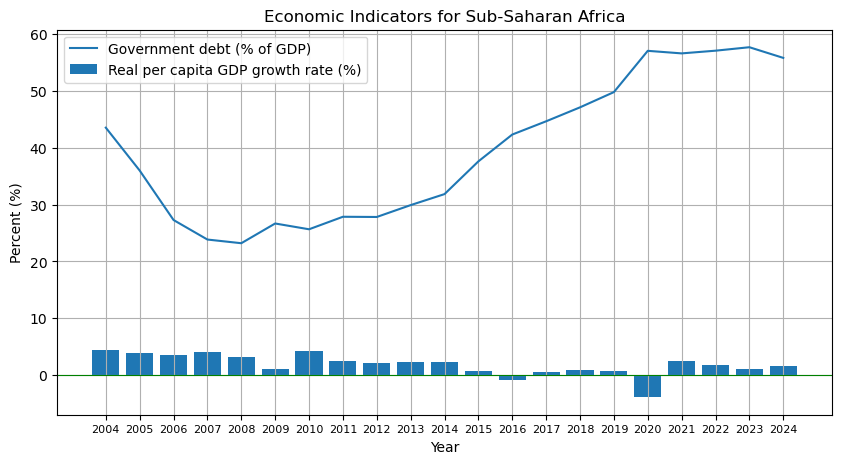

In [10]:
# Filter data for Sub-Saharan and convert relevant columns to float after replacing comma
Total_data = merged_data[merged_data['Country name'] == 'Sub-Saharan Africa']

# Ensure the data is in string format before replacing characters
Total_data['Real per capita GDP growth rate'] = Total_data['Real per capita GDP growth rate'].astype(str).str.replace(',', '.').astype(float)
Total_data['Government debt (Percent of GDP)'] = Total_data['Government debt (Percent of GDP)'].astype(str).str.replace(',', '.').astype(float)

# Ensure the 'Year' column is an integer
Total_data['Year'] = Total_data['Year'].astype(int)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(Total_data['Year'], Total_data['Real per capita GDP growth rate'], label='Real per capita GDP growth rate (%)')
plt.plot(Total_data['Year'], Total_data['Government debt (Percent of GDP)'], label='Government debt (% of GDP)', linestyle='-')
plt.axhline(0, color='green', linewidth=0.8)  # Adding a horizontal line at y=0
plt.title('Economic Indicators for Sub-Saharan Africa')
plt.xlabel('Year')
plt.ylabel('Percent (%)')
plt.xticks(Total_data['Year'].unique(), fontsize=8)  # Set x-ticks to show each year as an integer
plt.legend()
plt.grid(True)
plt.show()

Here we clearly see a negative correlation between GDP Growth and Public Debt. To analyse it formally we calculate the correlation. 

In [59]:
Average_data = merged_data[merged_data['Country name'] == 'Sub-Saharan Africa']

# Defining collums as strings
Average_data['Real per capita GDP growth rate'] = Average_data['Real per capita GDP growth rate'].astype(str).str.replace(',', '.').astype(float)
Average_data['Government debt (Percent of GDP)'] = Average_data['Government debt (Percent of GDP)'].astype(str).str.replace(',', '.').astype(float)

# Calculating the correlation between 'Real per capita GDP growth rate' and 'Government debt (Percent of GDP)'
correlation_average = Average_data['Real per capita GDP growth rate'].corr(Average_data['Government debt (Percent of GDP)'])
print('Correlation between GDP Growth and Public Debt for all Sub-Saharan countries:')
print(correlation_average)


Correlation between GDP Growth and Public Debt for all Sub-Saharan countries:
-0.5261353480453865


Now we want to focus on the two groups of countries defined as Resource-intensive countries and Non-resource-intensive countries in the data. So we plot them together with the average 'Sub-Saharan Africa'. Resource-intensive countries are defined as countries where nonrenewable natural resources represent 25 percent or more of total exports. 

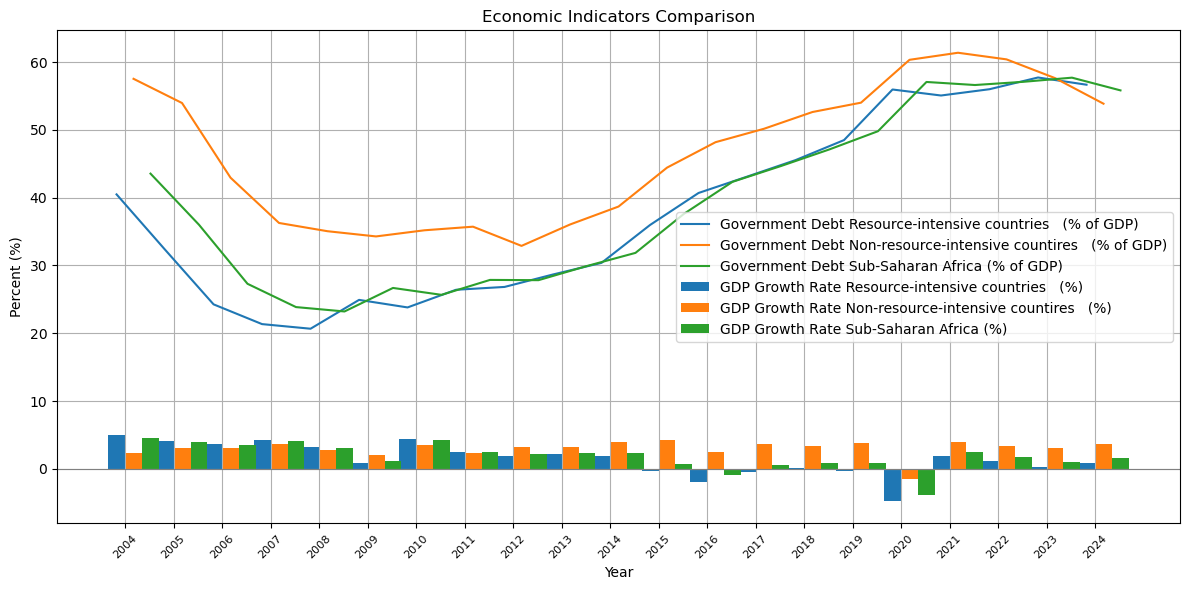

In [53]:


# Ensure columns are treated as string and convert relevant columns to float after replacing comma and handling 'no data'
merged_data['Real per capita GDP growth rate'] = merged_data['Real per capita GDP growth rate'].astype(str).str.replace(',', '.').replace('no data', np.nan).astype(float)
merged_data['Government debt (Percent of GDP)'] = merged_data['Government debt (Percent of GDP)'].astype(str).str.replace(',', '.').replace('no data', np.nan).astype(float)

# Sort the data by year
merged_data = merged_data.sort_values('Year')

# Select two countries for comparison
countries = ['Resource-intensive countries  ','Non-resource-intensive countires  ', 'Sub-Saharan Africa']  # Change to your countries of interest

# Plotting
plt.figure(figsize=(12, 6))

# Set an index for the bars
index = np.arange(len(merged_data['Year'].unique()))

bar_width = 0.35  # Set the bar width

# Plot bars and lines for each country
for i, country in enumerate(countries):
    country_data = merged_data[merged_data['Country name'] == country]
    country_data = country_data.sort_values('Year')  # Make sure the data is sorted by year
    
    # Plot GDP Growth Rate as bars
    plt.bar(index + i*bar_width, country_data['Real per capita GDP growth rate'], bar_width, label=f'GDP Growth Rate {country} (%)')
    
    # Plot Government Debt as line
    plt.plot(index + i*bar_width, country_data['Government debt (Percent of GDP)'], label=f'Government Debt {country} (% of GDP)', linestyle='-')

# Adding a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=0.8)
plt.title('Economic Indicators Comparison')
plt.xlabel('Year')
plt.ylabel('Percent (%)')
# Correctly set the x-ticks to align with the bars
plt.xticks(index + bar_width/2, merged_data['Year'].unique(), fontsize=8, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We see that Non-resource-intensive countries does not have the same strong negative correlation between GDP Growth and Public Debt that we see for Resource-intensive countries. We formally analyse we calculate the correlation for the two. 

In [60]:
# Filter the data for Angola
Intensive_data = merged_data[merged_data['Country name'] == 'Resource-intensive countries  ']

# Ensure the columns are treated as strings, replace commas, and then convert to floats
Intensive_data['Real per capita GDP growth rate'] = Intensive_data['Real per capita GDP growth rate'].astype(str).str.replace(',', '.').astype(float)
Intensive_data['Government debt (Percent of GDP)'] = Intensive_data['Government debt (Percent of GDP)'].astype(str).str.replace(',', '.').astype(float)

# Calculate the correlation between 'Real per capita GDP growth rate' and 'Government debt (Percent of GDP)'
correlation_intensive = Intensive_data['Real per capita GDP growth rate'].corr(Intensive_data['Government debt (Percent of GDP)'])
print('Correlation between GDP Growth and Public Debt for Resource-intensive countries:')
print(correlation_intensive)



Correlation between GDP Growth and Public Debt for Resource-intensive countries:
-0.5848835133300879


In [61]:
# Filter the data for Angola
NonIntensive_data = merged_data[merged_data['Country name'] == 'Non-resource-intensive countires  ']

# Ensure the columns are treated as strings, replace commas, and then convert to floats
NonIntensive_data['Real per capita GDP growth rate'] = NonIntensive_data['Real per capita GDP growth rate'].astype(str).str.replace(',', '.').astype(float)
NonIntensive_data['Government debt (Percent of GDP)'] = NonIntensive_data['Government debt (Percent of GDP)'].astype(str).str.replace(',', '.').astype(float)

# Calculate the correlation between 'Real per capita GDP growth rate' and 'Government debt (Percent of GDP)'
correlation_Nonintensive = NonIntensive_data['Real per capita GDP growth rate'].corr(NonIntensive_data['Government debt (Percent of GDP)'])
print('Correlation between GDP Growth and Public Debt for Non-resource-intensive countries:')
print(correlation_Nonintensive)


Correlation between GDP Growth and Public Debt for Non-resource-intensive countries:
-0.15767659972774384


# Conclusion

ADD CONCISE CONLUSION.